<a href="https://colab.research.google.com/github/vaeeshnavee/TSF-GRIP-tasks/blob/main/Prediction_using_supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#Importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [95]:
#Importing the data set
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print("Data imported successfully")

dataset.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting our dataset on a 2-D graph to analyse our dataset and see if we can manually find any relationship between the data. 

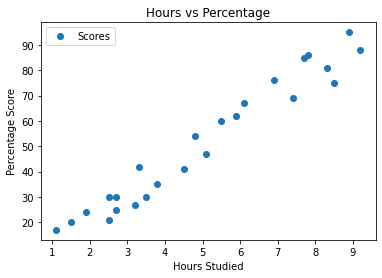

In [96]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Splitting the dataset into training and test sets by using Scikit-Learn's built-in train_test_split() method:



In [97]:
#Splitting dataset into training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.33, random_state=0) 

**Training the algorithm**

In [98]:
#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")


Training complete.


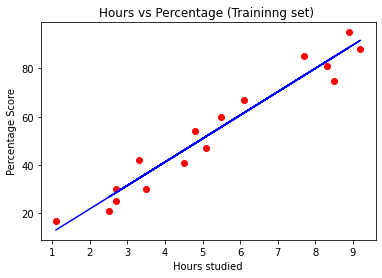

In [99]:
#Visualising the Training Set results

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage (Traininng set) ')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

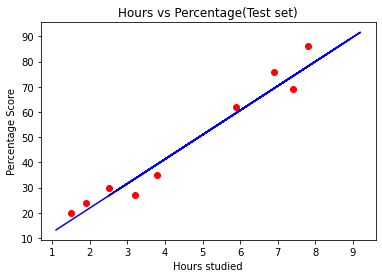

In [100]:
#Visualising the Test set results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

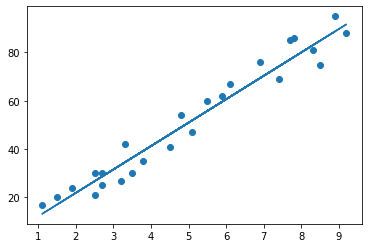

In [101]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Making Predictions**

In [102]:
#Predicting test result
y_pred = regressor.predict(X_test)

In [103]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [104]:
# Testing our own data
hours = 8.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8.25
Predicted Score = 82.45460845460846


**Evaluating the model**

In [105]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397446
